# 🧬 Breast Cancer Subtype Classification using Deep Learning (METABRIC Dataset)


This notebook uses the METABRIC breast cancer dataset from Kaggle to build a deep learning model that classifies cancer subtypes based on gene expression profiles.

We will go through:
- Loading and preprocessing the data
- Building a deep neural network (DNN)
- Training and evaluating the model
- Visualizing the performance


## 📥 Load & Preprocess Data

In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [3]:

# Load the dataset
df = pd.read_csv("METABRIC_RNA_Mutation.csv")



/var/folders/wt/jvzb90d54yjbgpt08dkr77s80000gn/T/ipykernel_18096/3431097155.py:2: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("METABRIC_RNA_Mutation.csv")


In [5]:
# Drop rows with missing subtype labels
df = df.dropna(subset=["pam50_+_claudin-low_subtype"])

# Encode target variable
le = LabelEncoder()
df["subtype_encoded"] = le.fit_transform(df["pam50_+_claudin-low_subtype"])

# Drop non-feature columns and select only numeric features
non_feature_cols = df.columns[:30].tolist() + ["pam50_+_claudin-low_subtype", "subtype_encoded"]
X = df.drop(columns=non_feature_cols).select_dtypes(include='number')
y = df["subtype_encoded"]

# Scale the gene expression data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


## 🤖 Build & Train Deep Learning Model

In [6]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# One-hot encode target
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Define the model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(y_train_cat.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat, validation_split=0.2, epochs=50, batch_size=32)


Epoch 1/50


/Users/marissa/miniforge3/envs/ml/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4810 - loss: 1.5002 - val_accuracy: 0.7049 - val_loss: 0.7138
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8007 - loss: 0.5271 - val_accuracy: 0.7344 - val_loss: 0.6813
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8989 - loss: 0.2925 - val_accuracy: 0.7279 - val_loss: 0.7080
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9314 - loss: 0.1994 - val_accuracy: 0.7246 - val_loss: 0.7659
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9738 - loss: 0.0971 - val_accuracy: 0.7344 - val_loss: 0.8203
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9437 - loss: 0.1418 - val_accuracy: 0.7148 - val_loss: 0.9464
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9840 - loss: 0.0716 - val_accuracy: 0.7148 - val_loss: 1.0008
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9824 - loss: 0.0582 - val_accuracy: 0.7246 - val_loss: 1.0299
Epo

## 📏 Evaluate Model

In [7]:

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate on test set
loss, acc = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {acc:.4f}")

# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7998 - loss: 1.2941
Test Accuracy: 0.7848
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

       Basal       0.94      0.72      0.82        40
        Her2       0.78      0.82      0.80        44
        LumA       0.80      0.82      0.81       136
        LumB       0.79      0.74      0.76        92
          NC       0.00      0.00      0.00         1
      Normal       0.65      0.54      0.59        28
 claudin-low       0.71      0.97      0.82        40

    accuracy                           0.78       381
   macro avg       0.67      0.66      0.66       381
weighted avg       0.79      0.78      0.78       381



/Users/marissa/miniforge3/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marissa/miniforge3/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marissa/miniforge3/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

## 📊 Visualize Performance

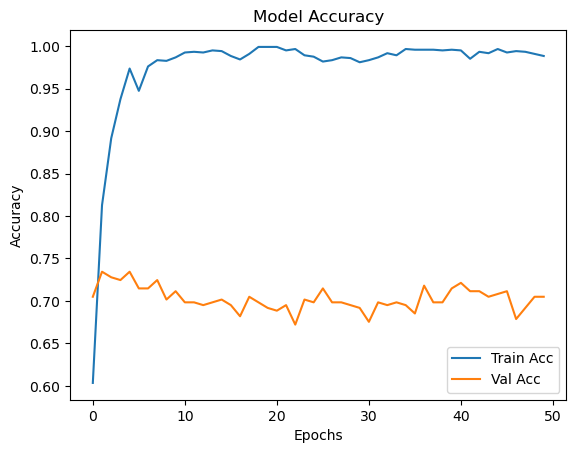

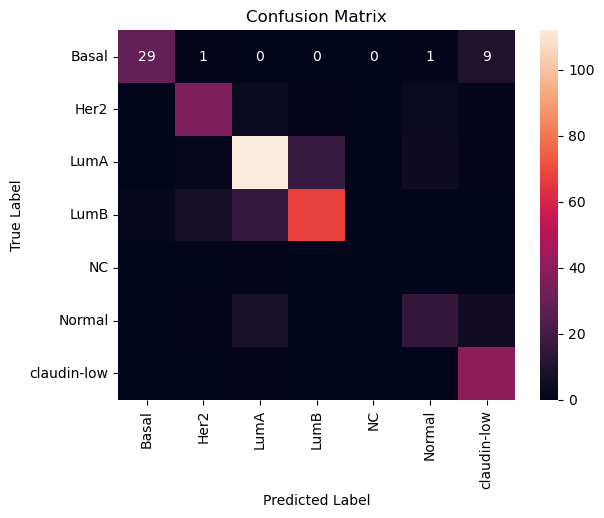

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion matrix
conf = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(conf, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


## 💾 Save Model

In [ ]:

# Save the trained model
model.save("metabric_subtype_classifier.h5")
